# tf.ipynb
Reference: https://realpython.com/python-scipy-fft/

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy import signal
from scipy.fft import rfft, rfftfreq
from icecream import ic

In [3]:
def create_square_wav(filepath:str, sample_rate:int, frequency:float, duration:float)->None:
    """ 
    Creates and saves a WAV file. Data saved as np.float32 ranging from -0.99 to 0.99
    """
    t = np.linspace(start=0., stop=duration,  num= int(duration * sample_rate), endpoint=False)
    square_wave = 0.99 * signal.square(2. * np.pi * frequency * t)
    wavfile.write(filepath, sample_rate, square_wave.astype(np.float32))

create_square_wav(filepath='square_wave.wav', sample_rate=6000, frequency=100., duration=0.1)

In [4]:
def create_sine_wav(filepath:str, sample_rate:int, frequency:float, duration:float)->None:
    """ 
    Creates and saves a WAV file. Data saved as np.float32 ranging from -0.99 to 0.99
    """
    t = np.linspace(start=0, stop=duration, num=int(duration * sample_rate), endpoint=False)
    sine_wave = 0.99 * np.sin(2. * np.pi * frequency * t)
    wavfile.write(filepath, sample_rate, sine_wave.astype(np.float32))

# create_sine_wav(filepath='sine_wave.wav', sample_rate=6000, frequency=100., duration=0.1)

In [76]:
samplerate, data = wavfile.read('beetle.wav')
ic(samplerate)
ic(data.shape)
padded_data = np.pad(data, (samplerate, samplerate), 'constant')
wavfile.write('beetle_padded.wav', samplerate, padded_data)
wavfile.write('beetle_padded_8k.wav', 8000, padded_data)

ic| samplerate: 6000
ic| data.shape: (718,)


In [10]:
def convert_wav_from_float64_to_int16(src_wav_path, dest_wav_path):
    """ 
    Converts a WAV file from float64 to int16.
    This function facilitates using a WAV file in a web page with HTML code like:
    HTML example: <audio controls src="myfile.wav"></audio>
    This code does not work for 64-bit or 32-bit WAV files.
    """
    samplerate, data = wavfile.read('beetle.wav')
    if data.dtype == 'float64':
        maxint = np.iinfo(np.int16).max
        data = np.int16((maxint - 1) * data)   # rescales data values from (-1.0, 1.0) to (-32766, 32766)
        wavfile.write('beetle_16bit.wav', samplerate, data)
    else:
        print(f'WARNING: {src_wav_path} was not converted because source data.dtype is not float64')
        
convert_wav_from_float64_to_int16('beetle.wav', 'beetle_16bit.wav')

In [11]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()
    
# run()


In [12]:
def plot_time_frequency(samplerate, data):
    """
    Plots a WAV file in time domain and frequency domain.
    The figure and its 2 sets of axes are returned so that these objects can be modified.
    """

    # Read WAV file
    ic(samplerate)
    ic(data.shape)
    duration = data.shape[0] / samplerate
    time = np.linspace(0., duration, data.shape[0])

    # Perform FFT and calculate frequency array
    power = np.abs(rfft(data))
    freq = rfftfreq(data.shape[0], 1/samplerate)
    
    # Create plot
    fig, (axt, axf) = plt.subplots(2, 1, constrained_layout=1, figsize=(7, 7))

    axt.plot(time, data, lw=1)
    axt.set_xlabel('time (s)')
    axt.set_ylabel('amplitude')

    axf.plot(freq, power, lw=1)
    axf.set_xlabel('frequency (Hz)')
    axf.set_ylabel('amplitude')
    axf.fill_between(freq, power)
    
    return fig, (axt, axf)

# wavefile_path = 'square_wave.wav'        
# fig, (axt, axf) = plot_time_frequency(wavefile_path)
# fig.suptitle(f'{wavefile_path} | fundamental freqency = ???')
# axf.set_xlim(0, 100)

ic| samplerate: 6000
ic| data.shape: (718,)


Text(0.5, 0.98, 'Raw data')

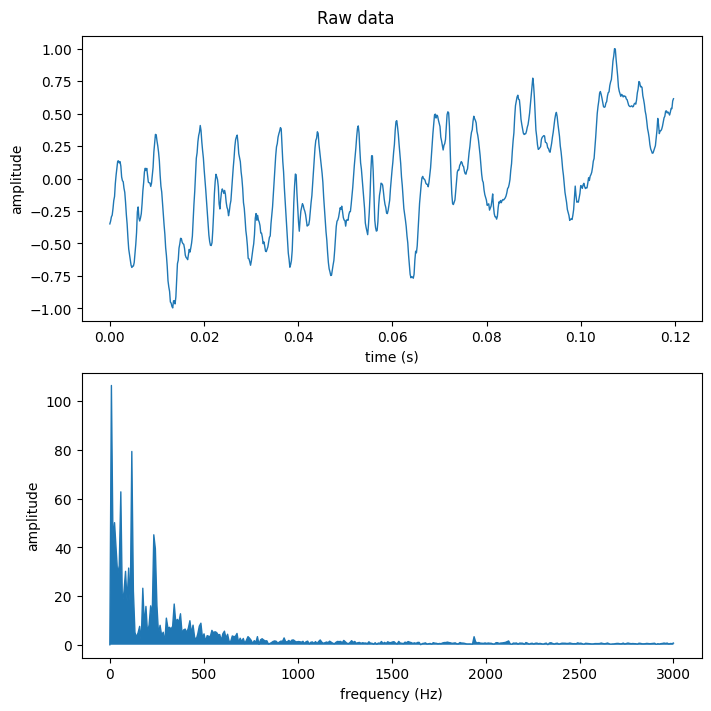

In [13]:
samplerate, data = wavfile.read('beetle.wav')
fig, (axt, axf) = plot_time_frequency(samplerate,data)
fig.suptitle('Raw data')

ic| samplerate: 6000
ic| data.shape: (718,)


Text(0.5, 0.98, 'Filtered data')

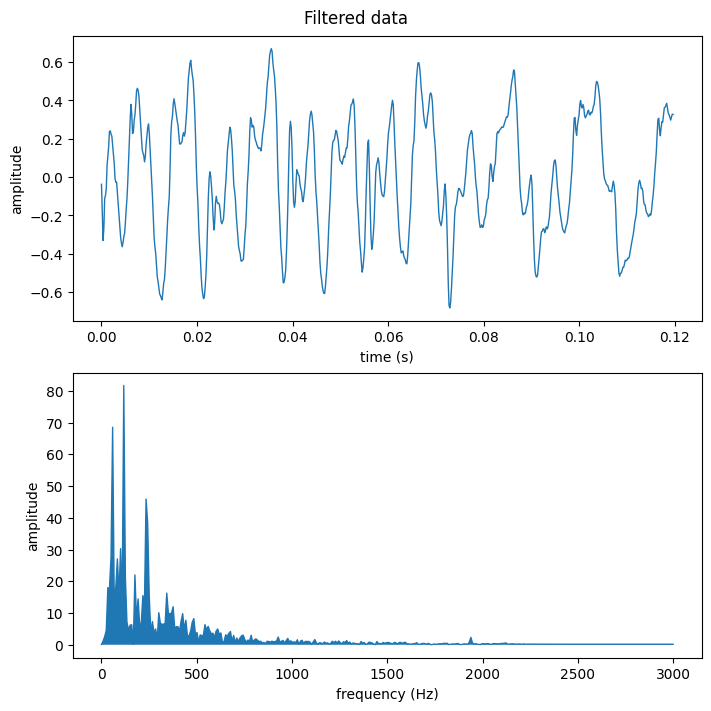

In [14]:
filtered_data = butter_bandpass_filter(data=data, lowcut=30, highcut=2000, fs=samplerate, order=6)
fig, (axt, axf) = plot_time_frequency(samplerate, filtered_data)
fig.suptitle('Filtered data')

ic| samplerate: 6000
ic| data.shape: (718,)


array([-2.79370375e-02, -2.62129442e-02, -2.36032107e-02, -2.26077999e-02,
       -1.86707900e-02, -1.36511623e-02, -1.11106207e-02, -3.04594720e-03,
        2.31462886e-03,  6.51427149e-03,  1.09458590e-02,  1.11872759e-02,
        9.93602550e-03,  1.07962015e-02,  7.96869659e-03,  1.06116377e-03,
       -1.38275667e-03, -2.08856828e-03, -6.41131908e-03, -9.17170168e-03,
       -1.60179155e-02, -2.43738825e-02, -3.10682096e-02, -4.06461000e-02,
       -4.88795738e-02, -5.31046531e-02, -5.77992446e-02, -6.18915146e-02,
       -6.41762330e-02, -6.39458956e-02, -6.45849881e-02, -6.26419933e-02,
       -5.63873230e-02, -5.01784743e-02, -4.16999416e-02, -2.61787040e-02,
       -2.24646552e-02, -3.15786004e-02, -3.44211379e-02, -3.23557869e-02,
       -2.92976697e-02, -2.12745282e-02, -1.06062590e-02, -3.75596045e-03,
        5.72638671e-03,  9.11353852e-03,  7.19983167e-03,  9.22726235e-03,
        2.83243752e-03, -3.52725676e-03, -4.01879206e-03, -4.28750306e-03,
       -7.69738419e-03, -

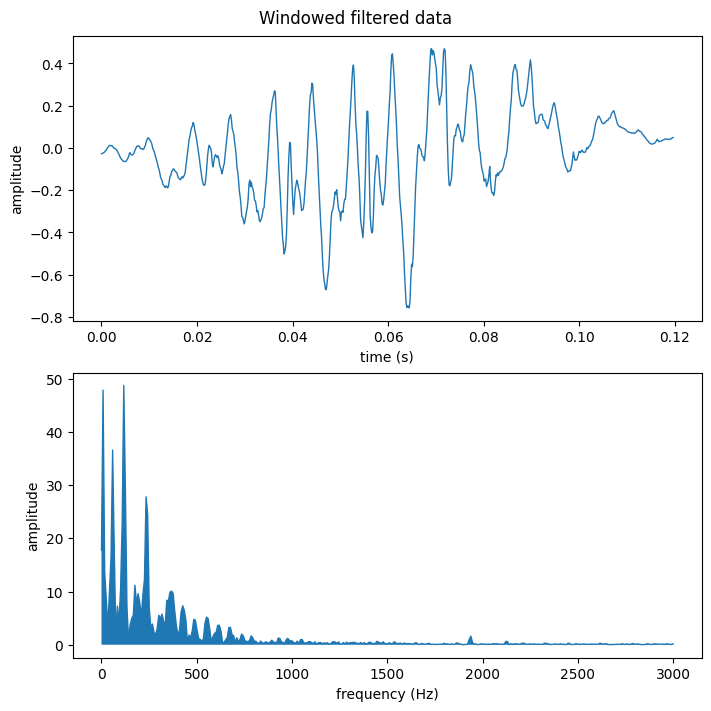

In [15]:
# apply Hanning window
windowed_filtered_data = np.hamming(len(filtered_data)) * data
fig, (axt, axf) = plot_time_frequency(samplerate, windowed_filtered_data)
fig.suptitle('Windowed filtered data')
windowed_filtered_data


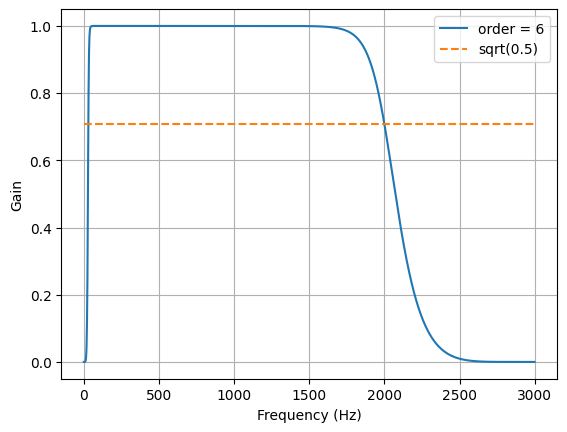

In [16]:
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 6000.0
lowcut = 30.0
highcut = 2000.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [6]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
            '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')



In [53]:
# Code from https://stackoverflow.com/questions/61534687/how-to-calculate-pitch-fundamental-frequency-f-0-in-time-domain

import numpy as np
from scipy.io import wavfile
from scipy.signal import correlate, fftconvolve
from scipy.interpolate import interp1d

def parabolic(f, x):
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)

def freq_from_autocorr(sig, fs):
    """
    Estimate frequency using autocorrelation
    """
    corr = correlate(sig, sig, mode='full')
    corr = corr[len(corr)//2:]
    d = np.diff(corr)
    start = np.nonzero(d > 0)[0][0]
    peak = np.argmax(corr[start:]) + start
    px, py = parabolic(corr, peak)

    return fs / px

fs = 6000.0
ic(freq_from_autocorr(data, fs));
ic(freq_from_autocorr(filtered_data, fs));
ic(freq_from_autocorr(windowed_filtered_data, fs));

ic| freq_from_autocorr(data, fs): np.float64(59.2980328421433)
ic| freq_from_autocorr(filtered_data, fs): np.float64(59.28821617899346)
ic| freq_from_autocorr(windowed_filtered_data, fs): np.float64(59.90349293453286)
